In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import numpy as np

In [48]:
df_tourney_wins = pd.read_pickle('df_tourney_wins').drop('diff', axis=1)
df_tourney_all_games =  pd.read_pickle('df_tourney_all_games')

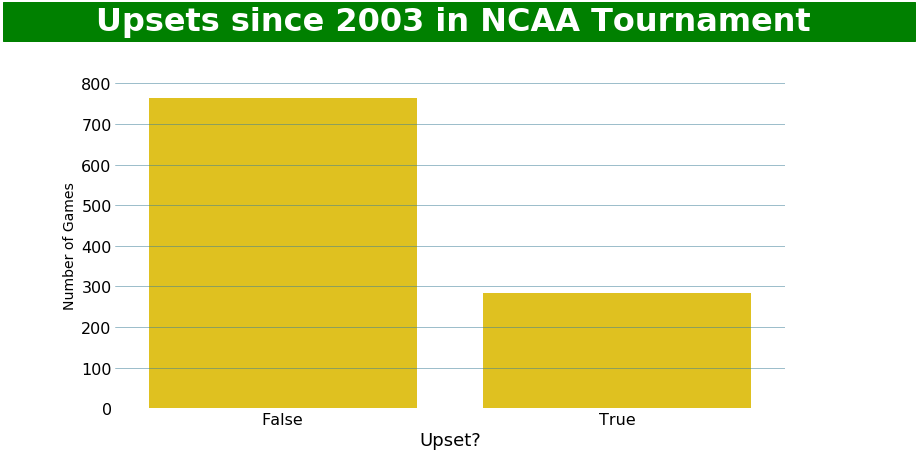

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=df_tourney_all_games['upset'], color='#FFD700')
plt.box(False)

fig.text(x=0, y=1, s='        Upsets since 2003 in NCAA Tournament         ', fontsize=32, weight='bold', color='white', backgroundcolor='green')

ax.yaxis.set_major_locator(MaxNLocator(integer=True, steps=[1, 2, 5, 10]))
ax.yaxis.grid(which='both', linewidth=0.5, color='#3c7f99')

plt.tick_params(axis='both', which='both',length=0)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Number of Games', fontsize=14), plt.xlabel('Upset?', fontsize=18);

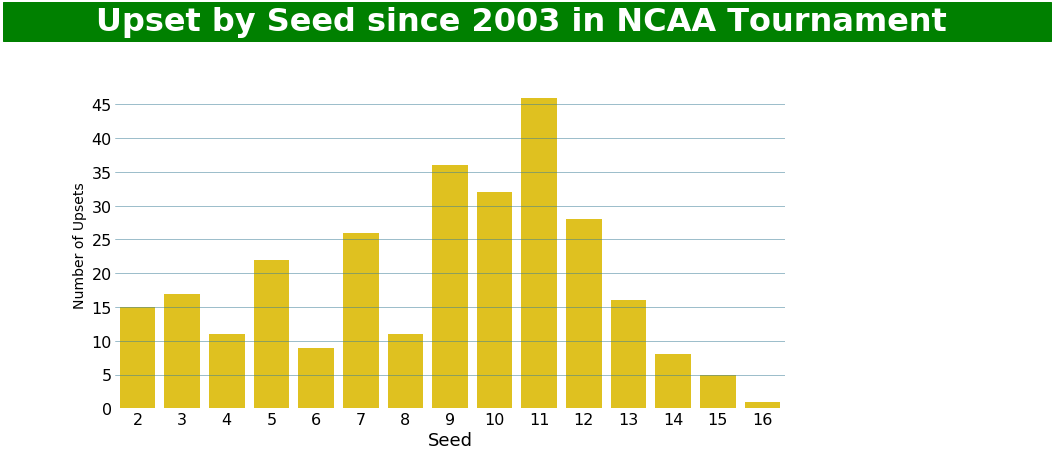

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=df_tourney_all_games[df_tourney_all_games['upset'] == True].Wseed, color='#FFD700')
plt.box(False)

fig.text(x=0, y=1, s='        Upset by Seed since 2003 in NCAA Tournament         ', fontsize=32, weight='bold', color='white', backgroundcolor='green')

ax.yaxis.set_major_locator(MaxNLocator(integer=True, steps=[1, 2, 5, 10]))
ax.yaxis.grid(which='both', linewidth=0.5, color='#3c7f99')

plt.tick_params(axis='both', which='both',length=0)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Number of Upsets', fontsize=14), plt.xlabel('Seed', fontsize=18);

Naturally seeds above 9 have the most "upsets". These teams all get a shot at an upset in the first game. 9's are just playing 8's and it counts as an upset, whereas 8s must be a 9 then a 1 to get a singular upset.

I'll look at the average difference between a the seeds in an upset.

In [35]:
upsets = df_tourney_all_games[df_tourney_all_games['upset'] == True]
upsets['seed_dif'] = upsets.apply(lambda row: row.Wseed - row.Lseed, axis=1)
upsets['seed_dif'].mean()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


4.498233215547703

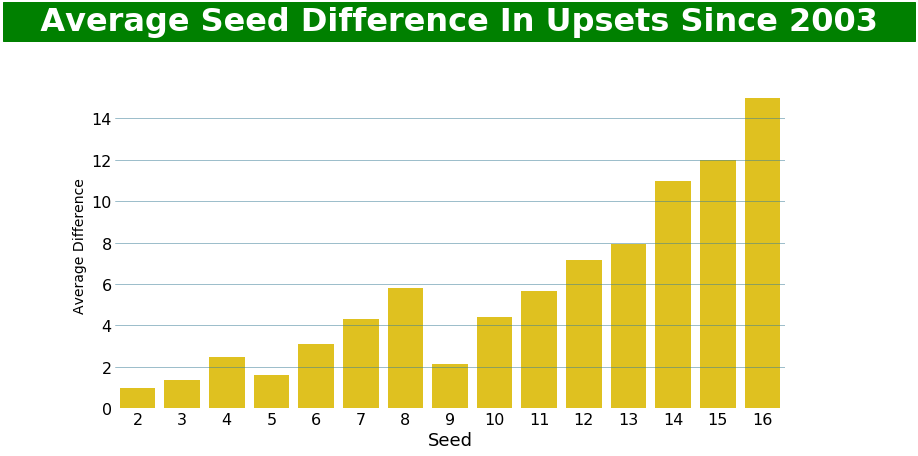

In [36]:
upset_seed_dif = upsets.groupby('Wseed').seed_dif.mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data= upset_seed_dif, x='Wseed',y='seed_dif', color='#FFD700')
plt.box(False)

fig.text(x=0, y=1, s='   Average Seed Difference In Upsets Since 2003   ', fontsize=32, weight='bold', color='white', backgroundcolor='green')

ax.yaxis.set_major_locator(MaxNLocator(integer=True, steps=[1, 2, 5, 10]))
ax.yaxis.grid(which='both', linewidth=0.5, color='#3c7f99')

plt.tick_params(axis='both', which='both',length=0)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Average Difference', fontsize=14), plt.xlabel('Seed', fontsize=18);

The difference mentioned above about 9s and 8s having different opportunities of creating an upset is on full display in the average seed difference of upsets. 9s average is 1.74 mmeaning that when they do beat the 8 seed they rarely beat the 1 seed in the next round. It looks like 8s are much better at providing big upsets, but that is only because their average does not include all the differences of 1 from beating the seed below them.

All other seeds above 9's upset difference stick around the difference between their first opponent (12 plays 5 so the difference is slightly above 7). This doesn't tell us much about which seeds produce good upsets. 

In [39]:
df_9_vs_1 = df_tourney_all_games[((df_tourney_all_games['Wseed'] == 9) & (df_tourney_all_games['Lseed'] == 1)) | 
              ((df_tourney_all_games['Wseed'] == 1) & (df_tourney_all_games['Lseed'] == 9))]

display(df_9_vs_1['Wseed'].groupby([df_9_vs_1.Wseed]).count())
display(df_9_vs_1['Wseed'].groupby([df_9_vs_1.Wseed]).count() / df_9_vs_1['Wseed'].count())

df_8_vs_1 = df_tourney_all_games[((df_tourney_all_games['Wseed'] == 8) & (df_tourney_all_games['Lseed'] == 1)) | 
              ((df_tourney_all_games['Wseed'] == 1) & (df_tourney_all_games['Lseed'] == 8))]

display(df_8_vs_1['Wseed'].groupby([df_8_vs_1.Wseed]).count())
display(df_8_vs_1['Wseed'].groupby([df_8_vs_1.Wseed]).count()  / df_8_vs_1['Wseed'].count())

Wseed
1    25
9     4
Name: Wseed, dtype: int64

Wseed
1    0.862069
9    0.137931
Name: Wseed, dtype: float64

Wseed
1    30
8     5
Name: Wseed, dtype: int64

Wseed
1    0.857143
8    0.142857
Name: Wseed, dtype: float64

The 8 seeds actually do fare better than the 9 seeds against 1 seeds. With 68 games for the 9 seeds and 70 for the 8 seeds the 8 seeds have a significantly higher win rate. 20% for 8 seeds vs ~9% for 9 seeds.

So what does this all mean? Not much, except that maybe the selection committee can actually seed properly? That can't be it...

We can look at first round matchups to see how often they are right when no madness has occurred making unforeseeable matchups.

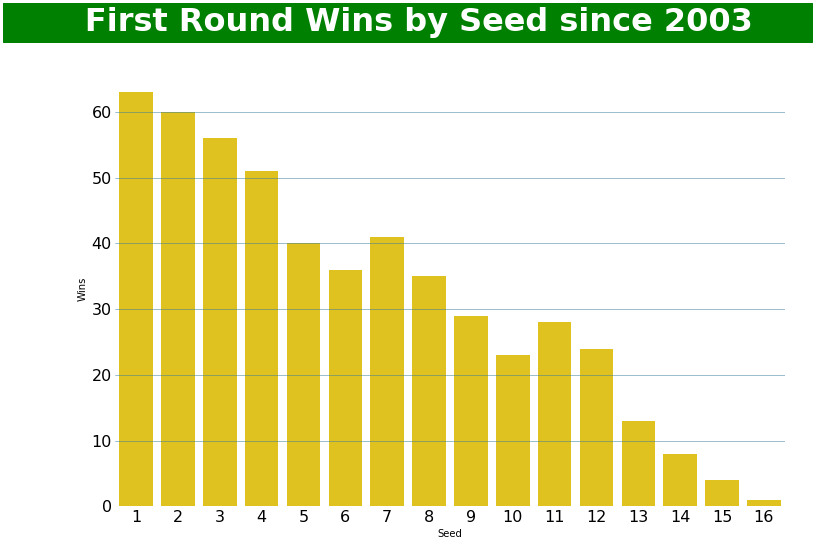

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x=df_tourney_all_games[df_tourney_all_games.tourn_round == 64].Wseed, color='#FFD700')
plt.box(False)

fig.text(x=0, y=0.95, s='       First Round Wins by Seed since 2003     ', fontsize=32, weight='bold', color='white', backgroundcolor='green')

plt.tick_params(axis='both', which='both',length=0)
plt.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.grid(which='both', linewidth=0.5, color='#3c7f99')
plt.xlabel('Seed'), plt.ylabel('Wins');

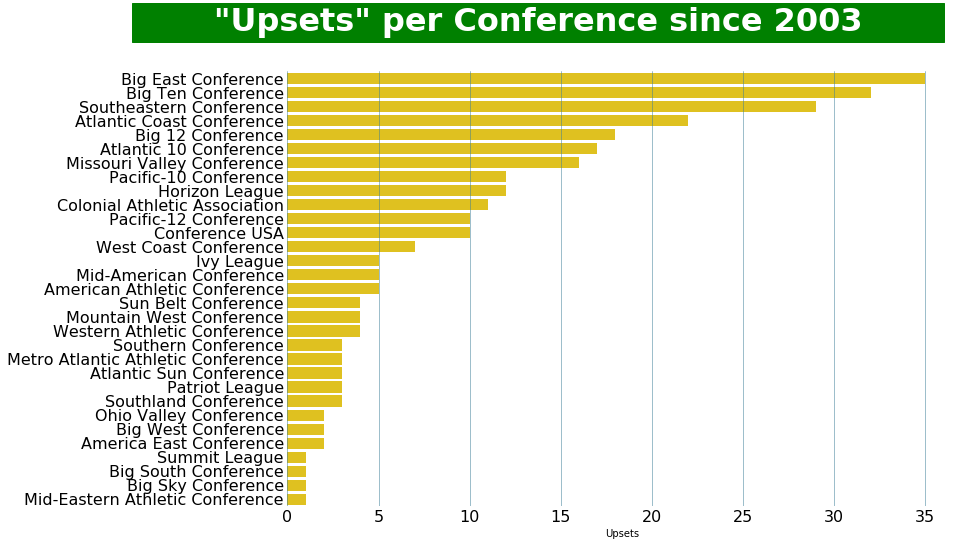

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(y=upsets.WConfName, order=upsets.WConfName.value_counts().index, color='#FFD700')
plt.box(False)

fig.text(x=-0.05, y=0.95, s='       "Upsets" per Conference since 2003       ', fontsize=32, weight='bold', color='white', backgroundcolor='green')

plt.tick_params(axis='both', which='both',length=0)
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.grid(which='both', linewidth=0.5, color='#3c7f99')
plt.xlabel('Upsets'), plt.ylabel('');

Of course some of these conferences don't exist anymore like the Big Eight Conference. With schools like University of Kansas and Oklahoma this eventually became the Big 12. Similarly the Pac-10 no longer exists as it changed it's name to the Pac-12 to represent the number of representatives within the conference (unlike some other conferences \**cough** Big 10 \**cough**).

The teams near the top are all mostly considered power conferences. The term power conference was formed for NCAA football as these were the five conferences in Football Subdivision (FBS). In basketball it is a little more broad because subdivisions do not exist. Generally speaking these "high-major" schools have the most money and best resources so when they win a game as a lower seed it's not much of an upset or "Cinderella Story". Usually when a team from one of these conferences wins an upset they are .500 in their conference and squeak in over a mid-major with well over 20 wins. We want to focus on mid major conferences like the Atlantic 10 (More than 10 schools \**sigh**), Missouri Valley, and West Coast Conference.

I will remove all the high-major conferences of Big East, Southeastern, Big 10, ACC, Pac-x, big 12/8

In [42]:
power_conf = ['Big East Conference', 'Southeastern Conference', 'Big Ten Conference', 'Atlantic Coast Conference',
              'Pacific-10 Conference', 'Pacific-12 Conference', 'Big Eight Conference', 'Big 12 Conference',
             'American Athletic Conference']
upsets = upsets[~upsets.WConfName.isin(power_conf)]

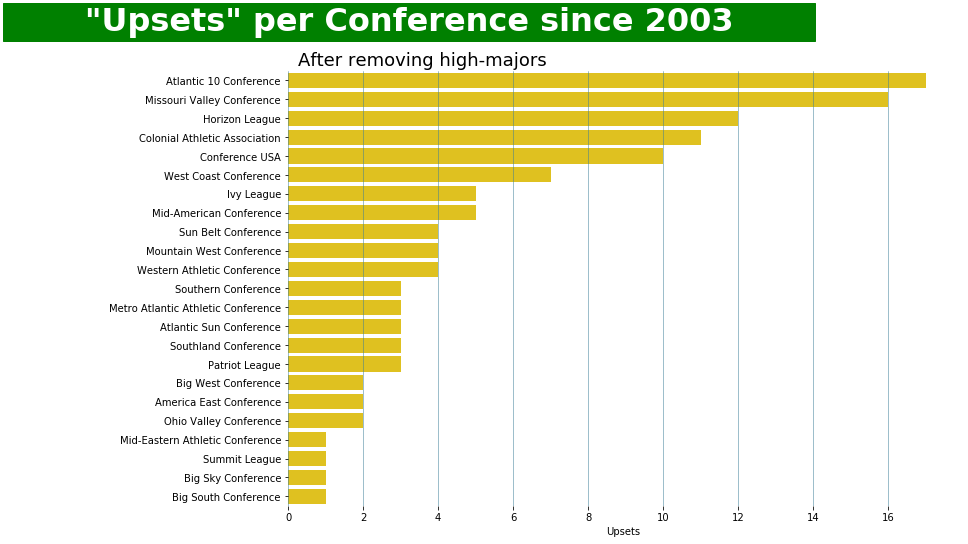

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(y=upsets.WConfName, order=upsets.WConfName.value_counts().index, color='#FFD700')
plt.box(False)

fig.text(x=-.2, y=0.95, s='       "Upsets" per Conference since 2003       ', fontsize=32, weight='bold', color='white', backgroundcolor='green')

plt.title(x=.2,label="After removing high-majors", fontsize='18')
ax.xaxis.grid(which='both', linewidth=0.5, color='#3c7f99')
plt.xlabel('Upsets'), plt.ylabel('');

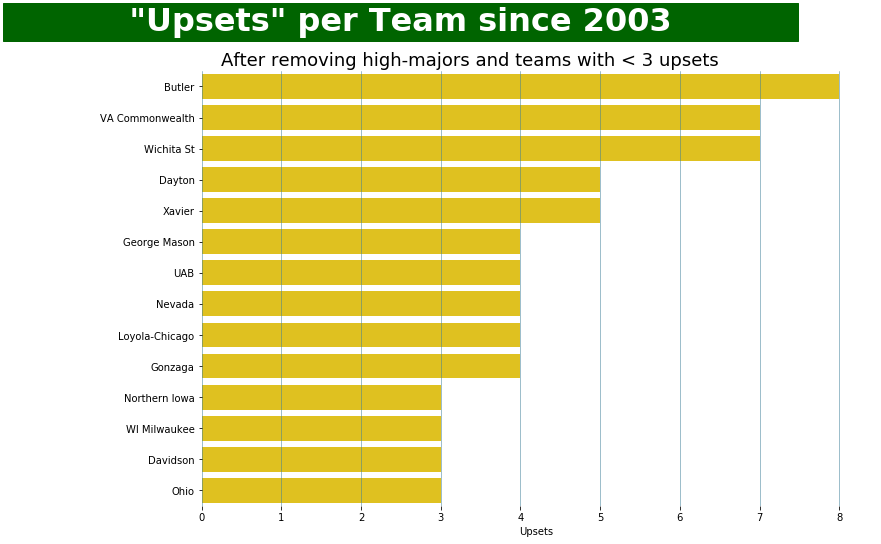

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(y=upsets.WTeamName, order=upsets.WTeamName.value_counts().index[upsets.WTeamName.value_counts() > 2], color='#FFD700')
plt.box(False)

fig.text(x=-.1, y=0.95, s='           "Upsets" per Team since 2003           ', fontsize=32, weight='bold', color='white', backgroundcolor='darkgreen')

plt.title(x=.4,label="After removing high-majors and teams with < 3 upsets", fontsize='18')
ax.xaxis.grid(which='both', linewidth=0.5, color='#3c7f99')
plt.xlabel('Upsets'), plt.ylabel('');

Many of these high totals are based off of one long run like 11 seeded Loyola-Chicago's final 4 run in 2018 powered by Sister Jean, George Mason's final 4 run in 2006 also an 11 seed, or Steph Curry carrying 10 seed Davidson to the Elite 8 in 2008. All wins post 1985 for these teams came from a singular run.

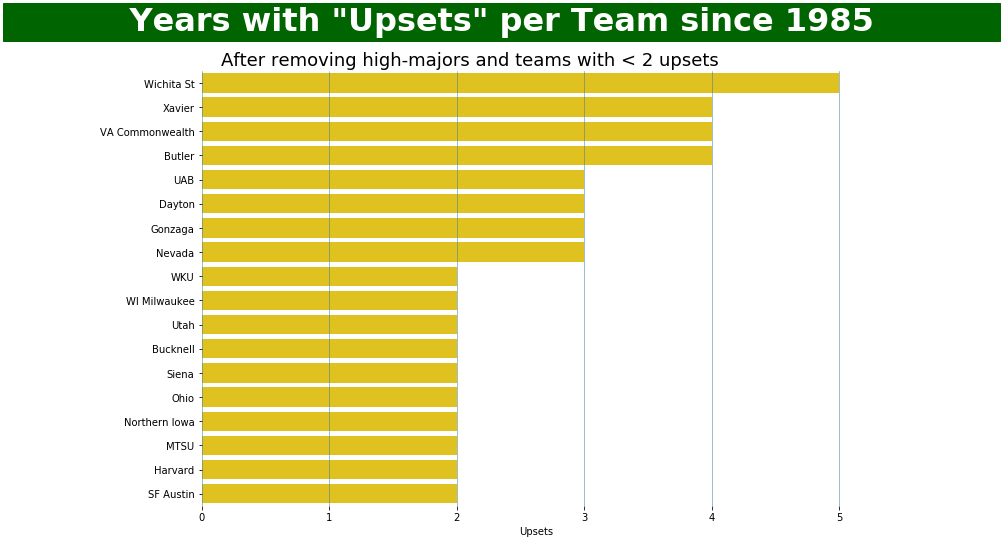

In [46]:
df_season_upsets = upsets.groupby(['WTeamName']).agg({"Season": pd.Series.nunique})
df_season_upsets = df_season_upsets[df_season_upsets['Season'] > 1].reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data = df_season_upsets.sort_values(by=['Season'], ascending=False),y='WTeamName', x='Season', color='#FFD700')
plt.box(False)

fig.text(x=-.1, y=0.95, s='           Years with "Upsets" per Team since 1985           ', fontsize=32, weight='bold', color='white', backgroundcolor='darkgreen')

plt.title(x=.4,label="After removing high-majors and teams with < 2 upsets", fontsize='18')
ax.xaxis.grid(which='both', linewidth=0.5, color='#3c7f99')
plt.xlabel('Upsets'), plt.ylabel('');

# How Far?
How far does an average team that pulls off an upset go?

In [56]:
grouped_df = df_tourney_wins[['Season', 'TeamName', 'seed', 'tourny_wins']].groupby(['seed'])
df_tourney_wins_describe = grouped_df['tourny_wins'].agg([np.sum, np.size, np.mean, np.std]).reset_index()
df_tourney_wins_describe['mean']

,seed,sum,size,mean,std
0,1,211.0,64.0,3.296875,1.649239
1,2,147.0,64.0,2.296875,1.508491
2,3,129.0,64.0,2.015625,1.485295
3,4,98.0,64.0,1.531250,1.208025
4,5,71.0,64.0,1.109375,1.128522
5,6,53.0,64.0,0.828125,0.882901
6,7,69.0,64.0,1.078125,1.199268
7,8,47.0,64.0,0.734375,0.995899
8,9,38.0,64.0,0.593750,0.830352
9,10,35.0,64.0,0.546875,0.871592


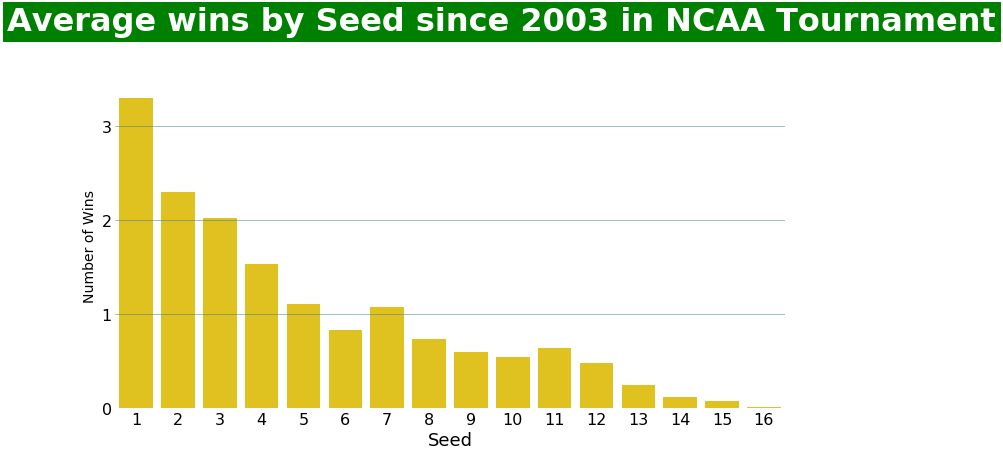

In [59]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=df_tourney_wins_describe.seed, y=df_tourney_wins_describe['mean'], color='#FFD700')
plt.box(False)
    
fig.text(x=0, y=1, s='Average wins by Seed since 2003 in NCAA Tournament', fontsize=32, weight='bold', color='white', backgroundcolor='green')

ax.yaxis.set_major_locator(MaxNLocator(integer=True, steps=[1, 2, 5, 10]))
ax.yaxis.grid(which='both', linewidth=0.5, color='#3c7f99')

plt.tick_params(axis='both', which='both',length=0)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Number of Wins', fontsize=14), plt.xlabel('Seed', fontsize=18);

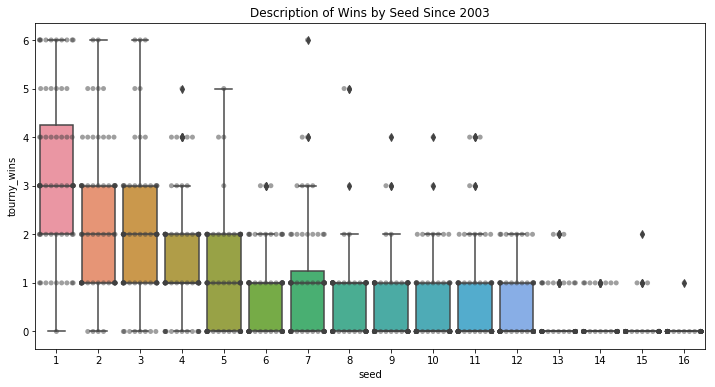

In [58]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x="seed", y="tourny_wins", data=df_tourney_wins);
ax = sns.swarmplot(x="seed", y="tourny_wins", data=df_tourney_wins, alpha=.5, s=5, color='.25')
plt.title('Description of Wins by Seed Since 2003');